# DSIR -  Project 2 

## Problem Statement

A homeowner with multiple properties is looking to sale some houses in Ames, IA  and they want to know what prices to expect. They have enlisted me to to predict what prices their properties will sale for. 

## Data Imports 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [559]:
train = pd.read_csv("./projects/project-02/datasets/train.csv")
test = pd.read_csv("./projects/project-02/datasets/test.csv")

In [584]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [ ]:
train["Year"]

In [210]:
print(train.shape)
print(test.shape)

(2051, 81)
(878, 80)


## Data Cleaning

In [211]:
train = train.dropna(axis='columns', how ='any', inplace = False )

Dropped all colunms containing missing valuess. Lost 26 columns 

In [212]:
train.isnull().sum().head()


Id             0
PID            0
MS SubClass    0
MS Zoning      0
Lot Area       0
dtype: int64

There are no longer any columns with missing values 

In [213]:
train.shape

(2051, 55)

In [214]:
train = train.drop(['Id', 'PID'], axis = 'columns')

In [215]:
train.dtypes

MS SubClass         int64
MS Zoning          object
Lot Area            int64
Street             object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Exter Qual         object
Exter Cond         object
Foundation         object
Heating            object
Heating QC         object
Central Air        object
Electrical         object
1st Flr SF          int64
2nd Flr SF          int64
Low Qual Fin SF     int64
Gr Liv Area         int64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGr

In [216]:
train[['MS SubClass', 'Mo Sold']] = train[['MS SubClass', 'Mo Sold']].astype(object)

In [217]:
train.dtypes

MS SubClass        object
MS Zoning          object
Lot Area            int64
Street             object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Exter Qual         object
Exter Cond         object
Foundation         object
Heating            object
Heating QC         object
Central Air        object
Electrical         object
1st Flr SF          int64
2nd Flr SF          int64
Low Qual Fin SF     int64
Gr Liv Area         int64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGr

The columns "Id" and "PID" were dropped because their values are arbitrary and do not contribute to the mathematical analysis of our variable of interest. Then the varibles'MS SubClass', and 'Mo Sold' were all transformed from integers into objects so that they would not be mathematically analyzed because in this case their numerical values are representations of catagorical values.

## EDA

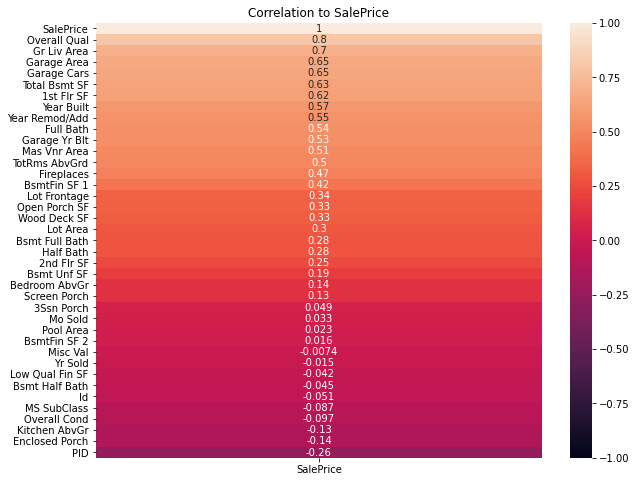

In [647]:
plt.figure(figsize = (10, 8))
plt.title("Correlation to SalePrice")
sns.heatmap(train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), vmin = -1, vmax = 1, annot = True);


In [648]:
price_correlation = train.corr()[['SalePrice']]
price_correlation.sort_values('SalePrice',ascending = False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650270
Garage Cars,0.648220
Total Bsmt SF,0.628925
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


The heatmap and distribution of correlation to 'Salesprice' shows that the highest correlation to salesprice include the features "Overall Qual" = .8 correlation, "Gr Liv Area" = .69 correlation, "1st Fl SF" = .62 correlation, "Year Built" = .57 correlation, "Year Remodel/Add"= .55 correlation, "Ful Bath" =.53 correlation and "TotRms AbvGrd" = .5 correlation.

## Modeling

In [599]:
features = train[['Overall Qual', 'Gr Liv Area', '1st Flr SF', 'Year Built','Year Remod/Add','Full Bath', 'TotRms AbvGrd']]

In [285]:
SalePrice =train['SalePrice']

<Figure size 2160x2160 with 0 Axes>

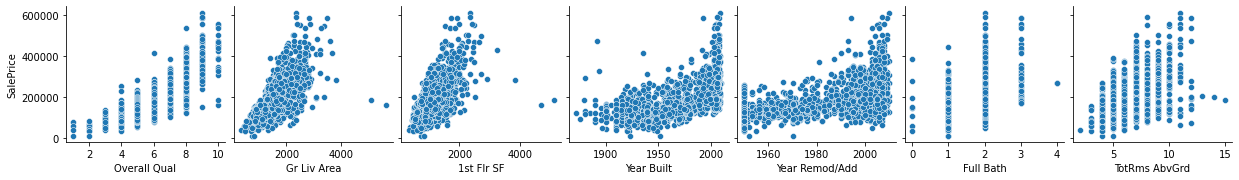

In [623]:
plt.figure(figsize = (30, 30));
sns.pairplot(data = train, y_vars = ['SalePrice'], x_vars = features);

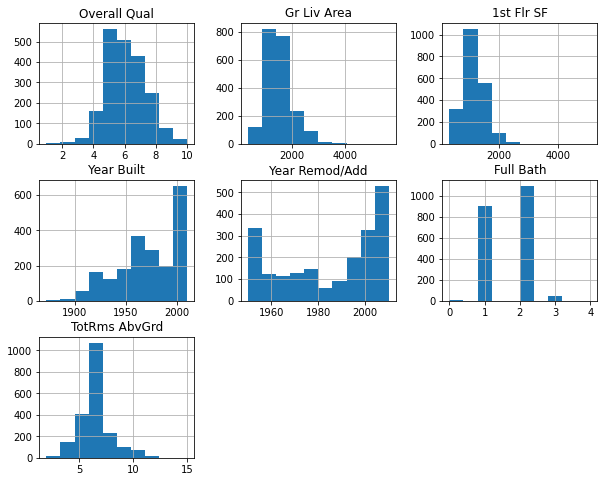

In [639]:
features.hist(figsize = (10,8));

A "features" group was made consisting of all of the variables that were the most highly correlted to the SalePrice. All the variables within "features" show a normal distribution with the excpetion of 'Year Built'and 'Year Remod/Add'.

In [600]:
X = features

In [288]:
y = train['SalePrice']

In [289]:
X.shape[0] == y.shape[0]

True

made sure that the size of each variable matches before perfroming my baseline analysis

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42)

In [324]:
X_train.head()

,Overall Qual,Gr Liv Area,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd
226,6,1224,1224,1999,1999,2,5
1742,7,1342,698,2003,2003,2,7
1516,5,1276,1276,1958,1958,1,5
1568,6,1215,720,1940,1950,1,6
862,8,1830,1302,2006,2006,2,7


In [325]:
X_test.head()

,Overall Qual,Gr Liv Area,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd
1124,5,954,954,1976,1976,1,6
188,7,2157,1216,1966,1966,2,8
1727,8,2088,948,2007,2007,2,10
1658,6,1647,841,1915,1950,1,6
1424,7,1737,851,2006,2006,2,7


In [326]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1435, 7)
(1435,)
(616, 7)
(616,)


The data was split into a testing portion and a training portion. 70% of the data became the training set and 30% of the data became the testing set. I checked the size of each set to make sure that they matched up for future analysis.

In [327]:
lr = LinearRegression()

In [328]:
lr.fit(X_train,y_train)

LinearRegression()

## Model 1 Evaluation

In [333]:
ss = StandardScaler()

In [334]:
ss.fit(X_train)

StandardScaler()

In [335]:
scaled_X_train = ss.transform(X_train)
scaled_X_test = ss.transform(X_test)

In [336]:
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [603]:
lr_train1_score = lr.score(scaled_X_train, y_train)
lr_test1_score = lr.score(scaled_X_test, y_test)

print(lr_train1_score)
print(lr_test1_score)

0.7594495047826644
0.8196171317265603


The training and testing values were all transformed using standard scaler so that they could be measured on the same scale. This did not change our r^2 values, but will make it easier to transform the values for future comparisons.

In [361]:
cross_val_lr = cross_val_score(lr,scaled_X_train,y_train, cv = 5)
cross_val_lr.mean()

0.7409677169025451

Used cross line validation to get the baseline r^2 for the model. The baseline r^2 = .74. This is the value that I will try to improve upon.

In [379]:
from sklearn.linear_model import Ridge

In [435]:
mod1_ridge = Ridge(alpha = 20)

mod1_ridge_c = mod1_ridge.fit(scaled_X_train, y_train)

In [661]:
ridge_train1_score = mod1_ridge.score(scaled_X_train, y_train)
ridge_test1_score = mod1_ridge.score(scaled_X_test, y_test)

print(ridge_train1_score)
print(ridge_test1_score)

0.7593659281801862
0.8189037615439254


The ridge adjustment did not change the r^2 values because the model is underfit.

In [585]:
from sklearn.linear_model import Lasso

In [587]:
mod1_lass = Lasso(alpha = 20)

In [590]:
mod1_lass_c = mod1_lass.fit(scaled_X_train, y_train)

In [660]:
las_train1_score = mod1_lass.score(scaled_X_train, y_train)
las_test1_score = mod1_lass.score(scaled_X_test, y_test)

print(las_train1_score)
print(las_test1_score)

0.7594488920933378
0.8195853951316083


The Lasso regularization also did not change the r^2 values because the model is underfit. I decided to use the ridge model to evaluate my predictions and coefficients.

In [671]:
training_mse1 = mean_squared_error(y_train, mod1_ridge.predict(scaled_X_train))
testing_mse1 = mean_squared_error(y_test, mod1_ridge.predict(scaled_X_test))

print(training_mse1)
print(testing_mse1)

1541596088.5311625
1082489542.6597185


In [673]:
mod1_training_predictions = mod1_ridge.predict(scaled_X_test)

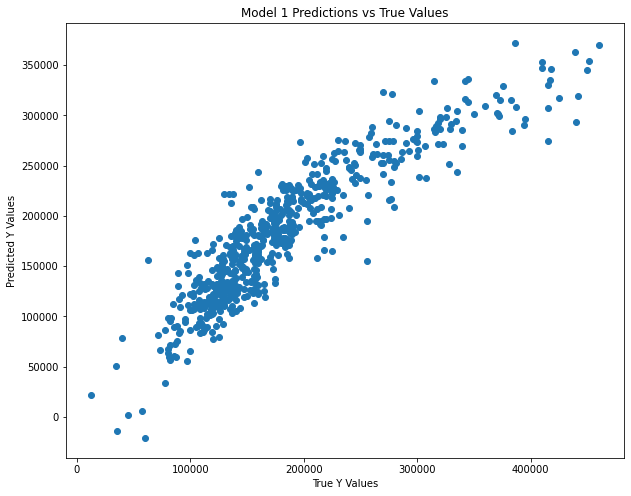

In [674]:
plt.figure(figsize = (10,8))
plt.title("Model 1 Predictions vs True Values")
plt.xlabel("True Y Values")
plt.ylabel("Predicted Y Values")
plt.scatter(y_test, mod1_training_predictions);

The plot of the residuals shows linearity and homoscedasticity showing that the model is fair. And the R^2 values as well as the MSE show the same.

In [675]:
mod1_coefs = mod1_ridge_c.coef_

In [676]:
mod1_coef_values = list(zip(X.columns, mod1_coefs))

In [677]:
mod1_data = pd.DataFrame(mod1_coef_values, columns= ['Features','Coefficient'])
mod1_data.sort_values('Coefficient', ascending = False)

,Features,Coefficient
0,Overall Qual,34111.292629
1,Gr Liv Area,22197.043794
2,1st Flr SF,13660.700361
3,Year Built,11405.621457
4,Year Remod/Add,6875.069449
6,TotRms AbvGrd,3379.944106
5,Full Bath,-3975.444735


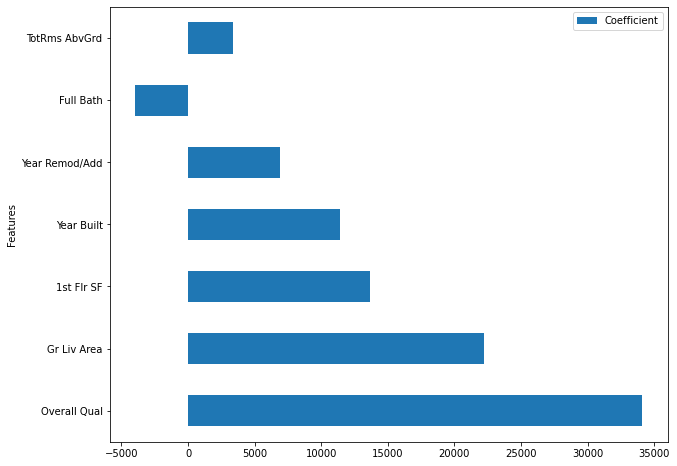

In [678]:
mod1_data.set_index("Features").plot(kind='barh', figsize = (10,8));

The plot of the residuals shows that the factors most affecting the model are "Overall Qual", "General Liv Area" And "1st Flr SF", which is slighlty different than what was predicted based only on correlation to SalePrice. 

## Model 2

In [538]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [539]:
polynom = PolynomialFeatures(include_bias = False)

In [540]:
X_polynom = polynom.fit_transform(X)

In [541]:
X_poly_columns = polynom.get_feature_names(X.columns)

In [542]:
X_poly_columns

['Overall Qual',
 'Gr Liv Area',
 '1st Flr SF',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'TotRms AbvGrd',
 'Overall Qual^2',
 'Overall Qual Gr Liv Area',
 'Overall Qual 1st Flr SF',
 'Overall Qual Year Built',
 'Overall Qual Year Remod/Add',
 'Overall Qual Full Bath',
 'Overall Qual TotRms AbvGrd',
 'Gr Liv Area^2',
 'Gr Liv Area 1st Flr SF',
 'Gr Liv Area Year Built',
 'Gr Liv Area Year Remod/Add',
 'Gr Liv Area Full Bath',
 'Gr Liv Area TotRms AbvGrd',
 '1st Flr SF^2',
 '1st Flr SF Year Built',
 '1st Flr SF Year Remod/Add',
 '1st Flr SF Full Bath',
 '1st Flr SF TotRms AbvGrd',
 'Year Built^2',
 'Year Built Year Remod/Add',
 'Year Built Full Bath',
 'Year Built TotRms AbvGrd',
 'Year Remod/Add^2',
 'Year Remod/Add Full Bath',
 'Year Remod/Add TotRms AbvGrd',
 'Full Bath^2',
 'Full Bath TotRms AbvGrd',
 'TotRms AbvGrd^2']

"X" was transformed using polynomial features and interaction columns were added. Following this X went from containg 7 features to now containing 35 features.

In [339]:
X_trainp, X_testp, y_trainp, y_testp = train_test_split(X_polynom,
                                                   y,
                                                   test_size = 0.3, 
                                                   random_state = 42)


In [340]:
print(X_trainp.shape)
print(y_trainp.shape)
print(X_testp.shape)
print(y_testp.shape)

(1435, 35)
(1435,)
(616, 35)
(616,)


In [474]:
lr_poly = LinearRegression()

In [475]:
lr_poly.fit(X_trainp, y_trainp)

LinearRegression()

In [598]:
print(lr_poly.score(X_trainp,y_trainp))
print(lr_poly.score(X_testp,y_testp))

0.8675867607250278
0.8721864539946889


In [684]:
cross_val_lr2 = cross_val_score(lr_poly, X_polynom ,y, cv = 5)
cross_val.mean()

0.8433548506101282

Used cross line validation to get the baseline r^2 for the model. The baseline r^2 = .84. This is the value that I will try to improve upon.

In [685]:
mod2_ridge = Ridge(alpha = 20)

mod2_ridge_c = mod2_ridge.fit(X_trainp, y_trainp)

In [686]:
print(mod2_ridge.score(X_trainp, y_trainp))
print(mod2_ridge.score(X_testp, y_testp))

0.8659265518580349
0.8736244377984129


In [687]:
cross_val_ridge2 = cross_val_score(mod2_ridge, X_polynom ,y, cv = 5)
cross_val.mean()

0.8433548506101282

The ridge adjustment did not change the r^2 values because the model is underfit.

In [592]:
mod2_lass = Lasso(alpha = 20)

In [593]:
mod2_lass_c = mod2_lass.fit(X_trainp, y_trainp)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639879312651.3616, tolerance: 919317189.919265
  model = cd_fast.enet_coordinate_descent(


In [594]:
print(mod2_lass.score(X_trainp, y_trainp))
print(mod2_lass.score(X_testp, y_testp))

0.8610957477173592
0.8698289098157456


In [688]:
cross_val_mod2_lass = cross_val_score(mod2_lass, X_polynom ,y, cv = 5)
cross_val.mean()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676753805282.1547, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721815128310.2651, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696913714746.1473, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWar

0.8433548506101282

The Lasso adjustment slightly decreased the r^2 value for the model. I decided to predict my data based on the ridge model

In [679]:
training_mse2 = mean_squared_error(y_trainp, mod2_ridge.predict(X_trainp))
testing_mse2 = mean_squared_error(y_testp, mod2_ridge.predict(X_testp))

print(training_mse2)
print(testing_mse2)

858927007.5864649
755400695.7695158


In [680]:
mod2_training_predictions = mod2_ridge.predict(X_testp)

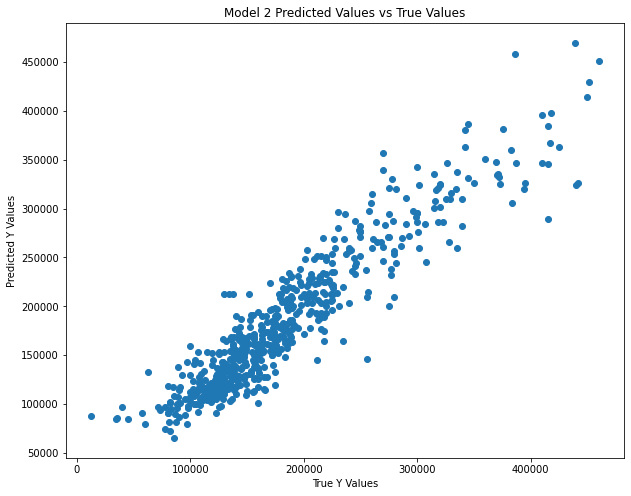

In [681]:
plt.figure(figsize = (10,8))
plt.title("Model 2 Predicted Values vs True Values")
plt.xlabel("True Y Values")
plt.ylabel("Predicted Y Values")
plt.scatter(y_test, mod2_training_predictions);

The plot of the residuals shows linearity and homoscedasticity showing that the model is fair. And the R^2 values as well as the MSE show the same and signifiy that this model is better at predicting SalePrice than the first model.

In [689]:
mod2_coefs = mod2_ridge_c.coef_

In [690]:
mod2_coef_values = list(zip(X_poly_columns, mod2_coefs))

In [691]:
mod2_data = pd.DataFrame(mod2_coef_values, columns= ['Features','Coefficient'])
mod2_data =mod2_data.sort_values('Coefficient', ascending = False)
mod2_data

,Features,Coefficient
3,Year Built,4850.314955
13,Overall Qual TotRms AbvGrd,2234.494347
7,Overall Qual^2,1323.603854
34,TotRms AbvGrd^2,456.298684
18,Gr Liv Area Full Bath,39.346422
10,Overall Qual Year Built,26.711670
31,Year Remod/Add TotRms AbvGrd,24.317114
27,Year Built Full Bath,22.395045
23,1st Flr SF Full Bath,15.513810
9,Overall Qual 1st Flr SF,13.845733


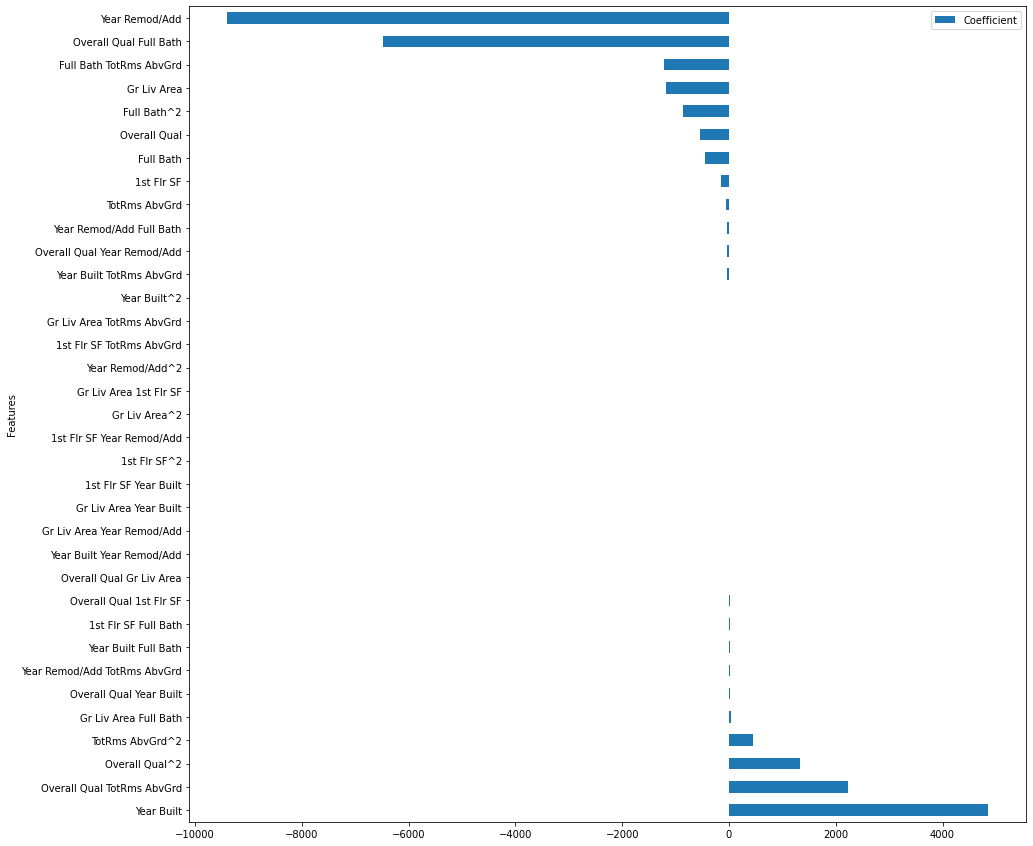

In [693]:
mod2_data.set_index("Features").plot(kind='barh',figsize = (15,15));

The plot of the residuals shows that the factors most affecting the model are "Year Remodel/Add", "Overall Qual/Full Bath" and "Year Built". 

## Submission Data

In [490]:
test = test.dropna(axis='columns', how ='any', inplace = False )

In [492]:
test = test.drop(['Id', 'PID'], axis = 'columns')

In [493]:
test[['MS SubClass', 'Mo Sold']] = test[['MS SubClass', 'Mo Sold']].astype(object)

In [532]:
X_test = test[['Overall Qual', 'Gr Liv Area', '1st Flr SF', 'Year Built','Year Remod/Add','Full Bath', 'TotRms AbvGrd']]

In [549]:
X_test_poly = polynom.transform(X_test)

In [550]:
X_test_columns = polynom.get_feature_names(X_test.columns)

In [552]:
X_test_poly.shape

(878, 35)

In [553]:
predicted_values = mod2_ridge.predict(X_test_poly)

In [555]:
len(predicted_values)

878

In [556]:
X_test["SalePrice"] = predicted_values

<ipython-input-556-0c6f0425c6c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["SalePrice"] = predicted_values


In [694]:
X_test.head()

,Overall Qual,Gr Liv Area,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,SalePrice
0,6,1928,908,1910,1950,2,9,142080.692265
1,5,1967,1967,1977,1977,2,10,174843.478517
2,7,1496,664,2006,2006,2,7,169289.574243
3,5,968,968,1923,2006,1,5,116499.270051
4,6,1394,1394,1963,1963,1,6,169535.577444


In [560]:
test = pd.read_csv("./projects/project-02/datasets/test.csv")

In [561]:
test['SalePrice'] = predicted_values

In [563]:
Kaggle_submission = test[['Id','SalePrice']]

In [568]:
Kaggle_submission = Kaggle_submission.sort_values('Id' ,ascending = True) 

In [569]:
Kaggle_submission.to_csv("./projects/project-02/datasets/kagglesubmission1.csv", index = False)

## Conclusions 

Model 2 was a better predictor of the SalePrice and it shows that when predicting selling price in Ames,IA the most important features are:

Year Remod/Add : $ -9401.535226  

Overall Qual Full Bath: $ -6477.499430 

Year Built: $4850.314955 

Overall Qual TotRms AbvGrd: $2234.494347


## Recommendations

Incorporating catagorical features into the model could definitely add strength

Imputing values instead of dropping could lead to a stronger model

More research into interpreting interactions and how they work together will allow you to give the client more concise steps in case they want to add value.
